In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
import joblib




import warnings
warnings.filterwarnings("ignore")

In [137]:
data = pd.read_csv('/Users/saptarshipal/DATA/boston_house_pricing_regression/data/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [138]:
data.shape

(13320, 9)

In [139]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [140]:
columns1 = ['area_type', 'size','availability', 'size']

for column in columns1:
    print(f"The {column} column has {data[column].nunique()} unique values.")

The area_type column has 4 unique values.
The size column has 31 unique values.
The availability column has 81 unique values.
The size column has 31 unique values.


In [141]:
df = data.copy()

In [142]:
df.drop(columns=['society', 'availability', 'location'],axis = 1,inplace =True)
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00


# Imputer

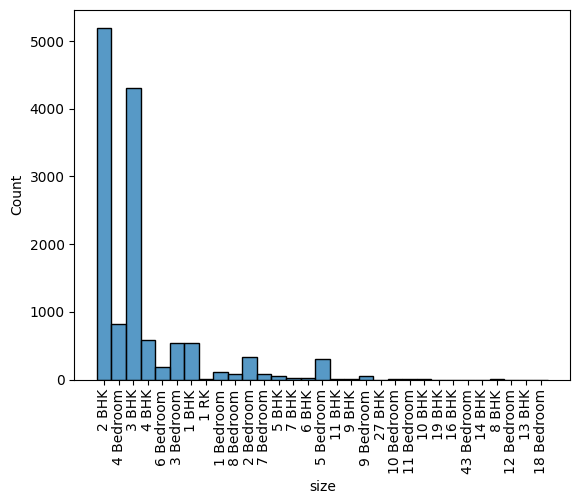

In [143]:
sns.histplot(df['size'])
plt.xticks(rotation=90)
plt.show()

In [144]:
df['size'] = df['size'].fillna('2 BHK')

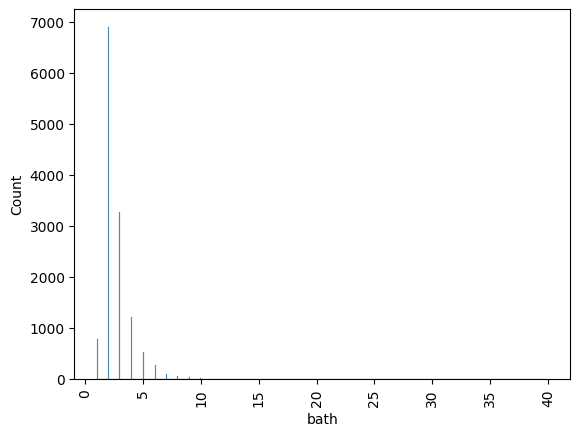

In [145]:
sns.histplot(df['bath'])
plt.xticks(rotation=90)
plt.show()

In [146]:
df['bath'] = df['bath'].fillna(2)

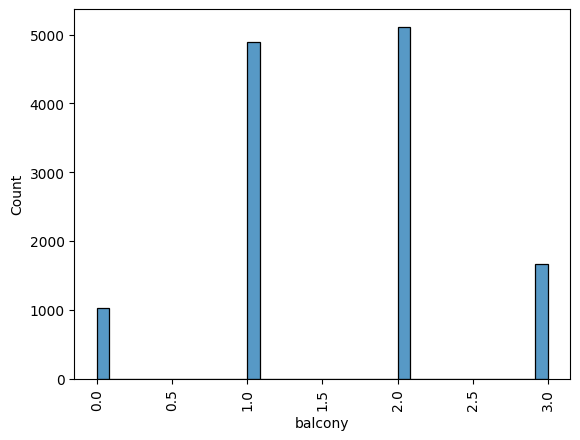

In [147]:
sns.histplot(df['balcony'])
plt.xticks(rotation=90)
plt.show()

In [148]:
df['balcony'] = df['balcony'].fillna(2)

In [149]:
df.isnull().sum()

area_type     0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# Encoding

In [150]:
df = pd.get_dummies(data = df,columns=['area_type','size'],dtype=int)

df.head()

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,size_1 BHK,size_1 Bedroom,...,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom,size_9 BHK,size_9 Bedroom
0,1056,2.0,1.0,39.07,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600,5.0,3.0,120.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440,2.0,3.0,62.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521,3.0,1.0,95.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200,2.0,1.0,51.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
